Install Requirements

In [8]:
%pip install opencv-python numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 20.2 MB/s eta 0:00:00


In [ ]:
%pip install scikit-learn

Download Dataset

Note: using dataset from here: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

1. Dataset Kaggle (for training + validation)

In [10]:
!curl -L -o tbc.zip https://www.kaggle.com/api/v1/datasets/download/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  663M  100  663M    0     0   164M      0  0:00:04  0:00:04 --:--:--  184M


In [11]:
!unzip -oq tbc.zip

2. Dataset TBX11K (for testing)

In [12]:
!gdown 1r-oNYTPiPCOUzSjChjCIYTdkjBTugqxR #tbx11k

Downloading...
From (original): https://drive.google.com/uc?id=1r-oNYTPiPCOUzSjChjCIYTdkjBTugqxR
From (redirected): https://drive.google.com/uc?id=1r-oNYTPiPCOUzSjChjCIYTdkjBTugqxR&confirm=t&uuid=c4ce2b78-5f84-4f0b-95cc-96a4fadca2a5
To: /content/TBX11K.zip
100% 3.31G/3.31G [00:28<00:00, 116MB/s] 


In [13]:
!unzip TBX11K.zip

Streaming output truncated to the last 5000 lines.
  inflating: TBX11K/imgs/health/h2436.png  
  inflating: TBX11K/imgs/health/h2089.png  
  inflating: TBX11K/imgs/health/h1252.png  
  inflating: TBX11K/imgs/health/h3160.png  
  inflating: TBX11K/imgs/health/h0407.png  
  inflating: TBX11K/imgs/health/h4922.png  
  inflating: TBX11K/imgs/health/h4025.png  
  inflating: TBX11K/imgs/health/h3843.png  
  inflating: TBX11K/imgs/health/h4630.png  
  inflating: TBX11K/imgs/health/h0598.png  
  inflating: TBX11K/imgs/health/h0056.png  
  inflating: TBX11K/imgs/health/h3597.png  
  inflating: TBX11K/imgs/health/h2926.png  
  inflating: TBX11K/imgs/health/h0066.png  
  inflating: TBX11K/imgs/health/h2929.png  
  inflating: TBX11K/imgs/health/h1970.png  
  inflating: TBX11K/imgs/health/h3091.png  
  inflating: TBX11K/imgs/health/h3148.png  
  inflating: TBX11K/imgs/health/h1969.png  
  inflating: TBX11K/imgs/health/h1807.png  
  inflating: TBX11K/imgs/health/h1893.png  
  inflating: TBX11K/imgs/

### Additional Functions

In [ ]:
#dataset.py

import os, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt

kernel_sharpen = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

kernel_dilation = np.ones((5, 5), np.uint8)



def get_dataset(    path_normal = "TB_Chest_Radiography_Database/Normal", path_tb = "TB_Chest_Radiography_Database/Tuberculosis"):
    x_normal=[]
    x_tb=[]
    for i, img in enumerate(os.listdir(path_normal)):
        image = cv2.imread(os.path.join(path_normal, img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Log transform
        image = (image)/255
        c = 255 / (1+np.max(image))
        image = c*np.log(1+image)
        image = np.array(image, dtype=np.uint8)

        image = cv2.equalizeHist(image)

        # image = cv2.equalizeHist(image)
        image = cv2.resize(image, (256, 256))
        # image = convolution(kernel_sharpen, image)
        image = abs(image+cv2.filter2D(image,-1,kernel_sharpen))
        image = cv2.bitwise_not(image)
        image = cv2.dilate(image, kernel_dilation, iterations=2)
        image = cv2.erode(image, kernel_dilation, iterations=2)
        image = cv2.copyMakeBorder(image, 2,2, 2, 2, borderType=cv2.BORDER_CONSTANT)
        x_normal.append(image)

    for i, img in enumerate(os.listdir(path_tb)):
        image = cv2.imread(os.path.join(path_tb, img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Log transform
        image = (image)/255
        c = 255 / (1+np.max(image))
        image = c*np.log(1+image)
        image = np.array(image, dtype=np.uint8)

        image = cv2.equalizeHist(image)


        # image = cv2.equalizeHist(image)
        image = cv2.resize(image, (256, 256))
        if image.shape != (256, 256):
            continue
        # image = convolution(kernel_sharpen, image)
        image = abs(image+cv2.filter2D(image,-1,kernel_sharpen))
        image = cv2.bitwise_not(image)
        image = cv2.dilate(image, kernel_dilation, iterations=2)
        image = cv2.erode(image, kernel_dilation, iterations=2)
        image = cv2.copyMakeBorder(image, 2,2, 2, 2, borderType=cv2.BORDER_CONSTANT)

        x_tb.append(image)

    return x_normal, x_tb

def get_dataset_test():
    # path_normal = "Chest-X-Ray/normal"
    # path_tb = "Chest-X-Ray/tb"
    path_normal = "TBX11K/imgs/health"
    path_tb = "TBX11K/imgs/tb"

    return get_dataset(path_normal, path_tb)

In [ ]:
# segmentation.py

import cv2, numpy as np
from collections import deque

def get_segmentation(source):
    ret3,th3 = cv2.threshold(source,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return th3


In [ ]:
# extractor.py

import cv2, numpy as np
from collections import deque
from skimage.feature import graycomatrix, graycoprops
from skimage.feature import local_binary_pattern

def glcm(img):
  glcm = graycomatrix(
      img,
      distances=[1],
      angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
      levels=256,
      symmetric=True,
      normed=True
  )
  contrast = graycoprops(glcm, 'contrast')
  dissimilarity = graycoprops(glcm, 'dissimilarity')
  homogeneity = graycoprops(glcm, 'homogeneity')
  energy = graycoprops(glcm, 'energy')
  correlation = graycoprops(glcm, 'correlation')
  return np.array([contrast, dissimilarity, homogeneity, energy, correlation]).flatten()

def lbp(img):
  radius = 2
  n_points = 8 * radius
  method = 'uniform'

  lbp = local_binary_pattern(img, n_points, radius, method)

  n_bins = int(n_points + 2)
  hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))

  hist = hist.astype('float')
  hist /= (hist.sum() + 1e-7)
  return hist

def feature_extraction(source):
  return np.concatenate([source.flatten(), glcm(source), lbp(source)])


### Import Library

In [1]:
import os, cv2, numpy as np, pandas as pd, matplotlib

In [2]:
import os
import sys

module_path = os.path.abspath(".")

# if module_path not in sys.path:
sys.path.append(module_path)

from dataset import *
from segmentation import *
from extractor import *

In [3]:
x_normal, x_tb = get_dataset()
x_normal_test, x_tb_test = get_dataset_test()

In [4]:
x_normal[0].shape

(260, 260)

In [5]:
x_tb[0].shape

(260, 260)

In [6]:
from matplotlib import pyplot

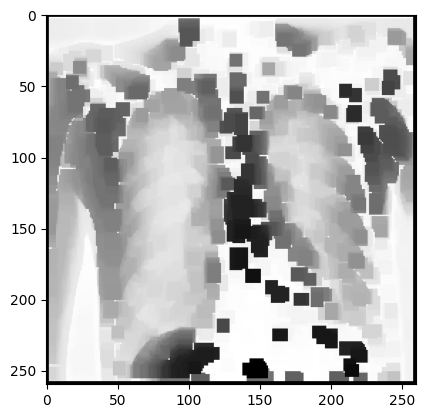

In [7]:
pyplot.imshow(x_normal[0], cmap="gray")

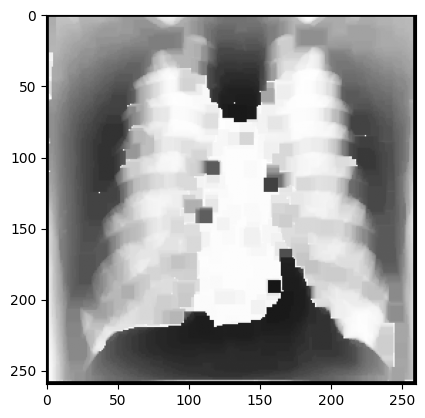

In [8]:
pyplot.imshow(x_tb[0], cmap="gray")

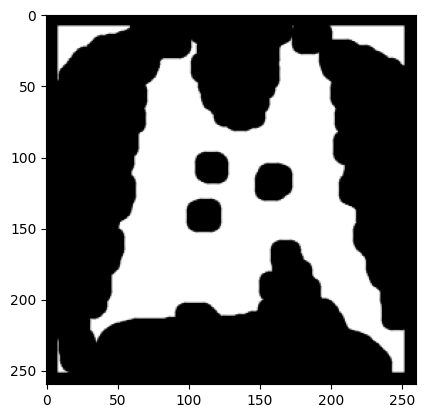

In [9]:
pyplot.imshow(get_segmentation(x_tb[0]), cmap="gray")

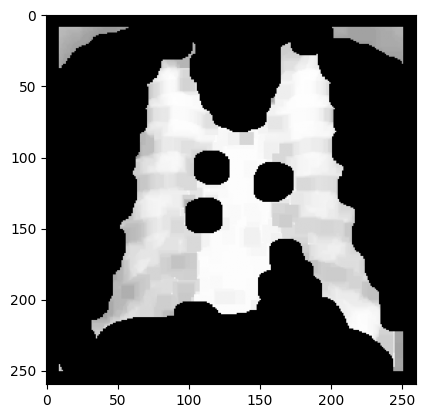

In [10]:
pyplot.imshow(np.where(get_segmentation(x_tb[0]) == 255, x_tb[0], 0).astype(np.uint8), cmap="gray")

Feature Extraction

In [11]:
np.array(x_tb).shape

(700, 260, 260)

In [12]:
glcm(x_tb[0])

array([4.89374636e+02, 8.58026297e+02, 4.19604871e+02, 8.64177845e+02,
       4.88105138e+00, 7.93074045e+00, 3.98226908e+00, 7.94684039e+00,
       6.44692230e-01, 4.96953795e-01, 7.23559599e-01, 5.04727941e-01,
       7.28360977e-02, 6.08675924e-02, 7.66280559e-02, 6.13294844e-02,
       9.57230613e-01, 9.24085569e-01, 9.63328212e-01, 9.23541307e-01])

In [13]:
lbp(x_tb[0])

array([0.00408284, 0.00813609, 0.00446746, 0.00535503, 0.00451183,
       0.01992604, 0.0337574 , 0.05890533, 0.06779586, 0.23164201,
       0.05510355, 0.11112426, 0.03421598, 0.01610947, 0.01539941,
       0.00940828, 0.27616864, 0.04389053])

In [14]:
feature_extraction(x_tb[0])

array([0.        , 0.        , 0.        , ..., 0.00940828, 0.27616864,
       0.04389053])

Setup Training, Validation and Testing Dataset

In [15]:
def get_features(img):
  return feature_extraction(np.where(get_segmentation(img) == 255, img, 0).astype(np.uint8))

In [16]:
x=[ get_features(z) for z in x_normal[:len(x_tb)]]
y=["normal"]*len(x_normal[:len(x_tb)])
x=x+[get_features(z)  for z in x_tb]
y=y+["tb"]*len(x_tb)
datatrainval = {
    "x": np.asarray(x),
    "y": np.asarray(y)
}

x_test=[get_features(z)  for z in x_normal_test]
y_test=["normal"]*len(x_normal_test)
x_test=x_test+[get_features(z)  for z in x_tb_test]
y_test=y_test+["tb"]*len(x_tb_test)
datatest = {
    "x": np.asarray(x_test),
    "y": np.asarray(y_test)
}

In [17]:
datatrainval["x"].shape

(1400, 67638)

In [18]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
import sklearn.ensemble as en
from sklearn.preprocessing import LabelEncoder

In [19]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
X_train, X_val, y_train, y_val = train_test_split(datatrainval["x"], datatrainval["y"] ,
                                   random_state=42,
                                   test_size=0.2,
                                   shuffle=True)

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
Xval_scaled = scaler.transform(X_val)
Xtest_scaled = scaler.transform(datatest["x"])

In [33]:
le = LabelEncoder()
new_y_train = le.fit_transform(y_train)
new_y_val = le.transform(y_val)
new_y_test = le.transform(datatest['y'])

In [34]:
X_scaled.shape

(1120, 67638)

In [35]:
new_y_train.shape

(1120,)

In [36]:
X_scaled

array([[ 0.        ,  0.        ,  0.        , ..., -0.64505605,
        -0.82180158,  0.82362969],
       [ 0.        ,  0.        ,  0.        , ..., -0.86498829,
         0.5384171 , -0.6757372 ],
       [ 0.        ,  0.        ,  0.        , ..., -1.17289344,
        -0.82633025, -1.32127403],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.38129444,
        -0.54328831, -1.07510932],
       [ 0.        ,  0.        ,  0.        , ...,  3.53365666,
         1.18989877, -1.67761036],
       [ 0.        ,  0.        ,  0.        , ..., -0.4251238 ,
         1.19669178, -0.72738014]])

In [37]:
new_y_train

array([1, 0, 0, ..., 1, 1, 1])

In [43]:
svm_clf = SVC(kernel='linear', probability=True)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

meta_model = LogisticRegression()

stacked = StackingClassifier(
    estimators=[('svm', svm_clf), ('rf', rf_clf)],
    final_estimator=meta_model,
    cv=3,
    n_jobs=-1
)

In [44]:
stacked.fit(X_scaled, new_y_train)

StackingClassifier(cv=3,
                   estimators=[('svm', SVC(kernel='linear', probability=True)),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
valresult = stacked.predict(Xval_scaled)

In [47]:
accuracy_score(new_y_val, valresult)

0.9178571428571428

In [48]:
from sklearn.metrics import classification_report
print(classification_report(new_y_val, valresult))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       140
           1       0.93      0.90      0.92       140

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280



In [52]:
result = stacked.predict(Xtest_scaled)

In [53]:
accuracy_score(new_y_test, result)

0.8478260869565217

In [54]:
from sklearn.metrics import classification_report
print(classification_report(new_y_test, result))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3800
           1       0.60      0.39      0.47       800

    accuracy                           0.85      4600
   macro avg       0.74      0.67      0.69      4600
weighted avg       0.83      0.85      0.83      4600



In [58]:
le.classes_

array(['normal', 'tb'], dtype='<U6')

In [59]:
from joblib import dump, load
dump(stacked, "stacked.joblib")

['stacked.joblib']

In [60]:
from joblib import dump, load
dump(le, "le.joblib")

['le.joblib']

In [61]:
from joblib import dump, load
dump(scaler, "scaler.joblib")

['scaler.joblib']

In [62]:
!ls -lah

total 4.0G
drwxr-xr-x 1 root root 4.0K Dec  2 15:07 .
drwxr-xr-x 1 root root 4.0K Dec  2 14:00 ..
-rwxr-xr-x 1 root root 838K Dec  2 14:07 code.ipynb
drwxr-xr-x 4 root root 4.0K Nov 20 14:25 .config
-rw-r--r-- 1 root root 2.4K Dec  2 14:21 dataset.py
-rw-r--r-- 1 root root 1.2K Dec  2 14:51 extractor.py
drwxr-xr-x 2 root root 4.0K Dec  2 14:07 .ipynb_checkpoints
-rw-r--r-- 1 root root  375 Dec  2 15:07 le.joblib
-rw-r--r-- 1 root root    0 Dec  2 14:07 main.py
drwxr-xr-x 2 root root 4.0K Dec  2 14:51 __pycache__
-rw-r--r-- 1 root root  113 Dec  2 14:07 README.md
-rw-r--r-- 1 root root 199K Dec  2 14:07 recall60.ipynb
drwxr-xr-x 1 root root 4.0K Nov 20 14:25 sample_data
-rw-r--r-- 1 root root 1.6M Dec  2 15:07 scaler.joblib
-rw-r--r-- 1 root root  779 Dec  2 14:21 segmentation.py
-rw-r--r-- 1 root root 207M Dec  2 15:07 stacked.joblib
drwxr-xr-x 4 root root 4.0K Dec  2 14:05 TB_Chest_Radiography_Database
-rw-r--r-- 1 root root 664M Dec  2 14:05 tbc.zip
drwxrwxrwx 6 root root 4.0K Jun 24